### Explore Bike Share Data

This project is about exploring US bikeshare data of three cities namely Chicago, New York and Washington. You can see basic stats like which is the most common start staion, end station and combination of both. Plots are generated using ggplot2 to better understand the usage pattern.

In [1]:
# loading the required packages
library(dplyr)
library(ggplot2)
library(lubridate)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [2]:
# loading the required datasets
ny = read.csv('new_york_city.csv', row.names = 1)
wash = read.csv('washington.csv', row.names = 1)
chi = read.csv('chicago.csv', row.names = 1)

In [3]:
# display top 6 rows 
head(ny)

,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
# display top 6 rows 
head(wash)

,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
# display top 6 rows 
head(chi)

,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [6]:
# before moving on, let's set the default width and height for the plots.
options(repr.plot.width = 9, repr.plot.height = 4)

### Question 1


### What is the most common start station?

**Defining a function that will generate the plot.**

In [7]:
# define a function that takes data(dataframe) and city(character) to plot the chart between start station and total trips 
# taken from that station.
start_station_plot_viz <- function(data, city) {
  main <- sprintf('Most Popular Start Stations by Trip Count: %s', city)
  xlabel <- 'Start Station'
  ylabel <- 'Total Trips'
  p <- ggplot(data, aes(Start.Station, total_trips)) +
    geom_bar(stat = 'identity',
             fill = 'cyan',
             width = 0.5) +
    ggtitle(main) + 
    xlab(xlabel) +
    ylab(ylabel) +
    theme_minimal() + 
    coord_flip()
  return(p)
}

**Defining a function that will take the dataset as an argument, group by start station and summarize by count of trips and return the top 10 observations.**

In [8]:
# define a function that will take the data(dataframe) and aggregate it by start station to find the count
most_common_start_station <- function(data) {
  data %>%
    select(Start.Station) %>%
    group_by(Start.Station) %>%
    summarise(total_trips = n()) %>%
    arrange(desc(total_trips)) %>%
    as.data.frame() %>%
    head(10)
}

Start.Station,total_trips
Pershing Square North,592
W 21 St & 6 Ave,385
Broadway & E 22 St,383
E 17 St & Broadway,380
West St & Chambers St,364
W 20 St & 11 Ave,329
8 Ave & W 31 St,316
8 Ave & W 33 St,302
W 41 St & 8 Ave,292
Greenwich Ave & 8 Ave,288


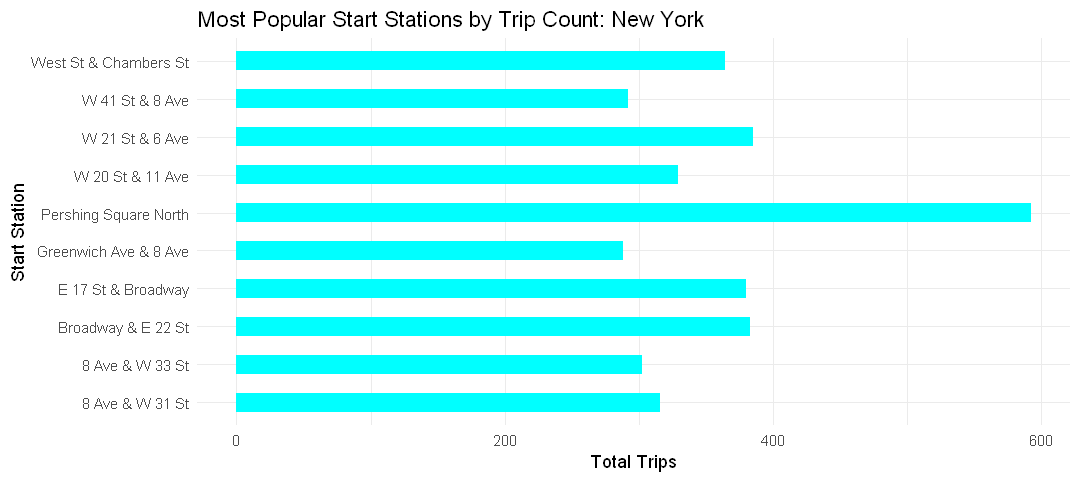

In [9]:
# for New York dataset

# call most_common_start_function to get the data
ny_most_common_start_station <- most_common_start_station(ny)

# print the data
ny_most_common_start_station

# generate the plot
start_station_plot_viz(ny_most_common_start_station, 'New York')

Start.Station,total_trips
Streeter Dr & Grand Ave,210
Lake Shore Dr & Monroe St,140
Clinton St & Washington Blvd,120
Clinton St & Madison St,102
Canal St & Adams St,101
Michigan Ave & Oak St,98
Canal St & Madison St,87
Columbus Dr & Randolph St,85
Lake Shore Dr & North Blvd,85
Franklin St & Monroe St,81


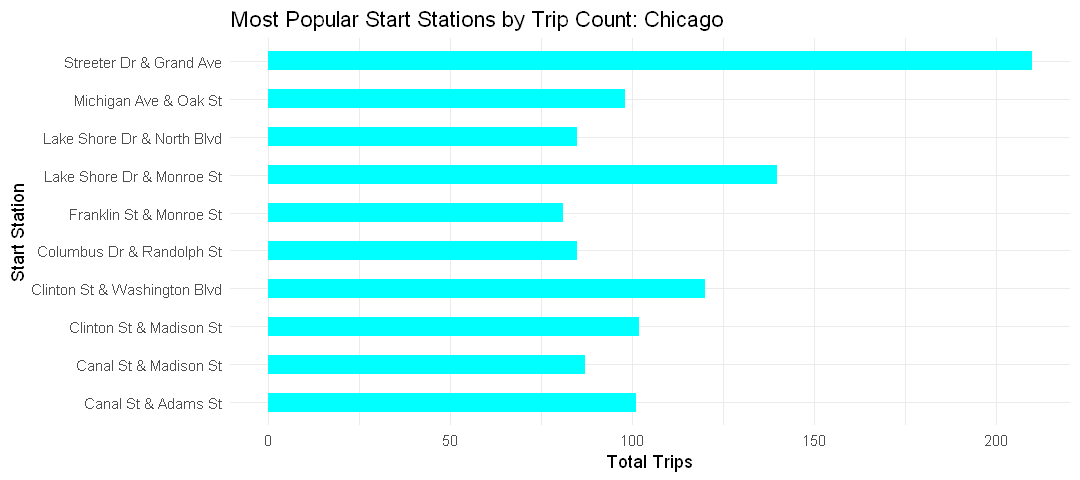

In [10]:
# for Chicago dataset

# call most_common_start_function to get the data
chi_most_common_start_station <- most_common_start_station(chi)

# print the data
chi_most_common_start_station

# generate the plot
start_station_plot_viz(chi_most_common_start_station, 'Chicago')

Start.Station,total_trips
Columbus Circle / Union Station,1700
Lincoln Memorial,1546
Jefferson Dr & 14th St SW,1488
Massachusetts Ave & Dupont Circle NW,1219
Jefferson Memorial,1068
15th & P St NW,1040
Smithsonian-National Mall / Jefferson Dr & 12th St SW,1010
Henry Bacon Dr & Lincoln Memorial Circle NW,910
4th St & Madison Dr NW,894
Eastern Market Metro / Pennsylvania Ave & 7th St SE,823


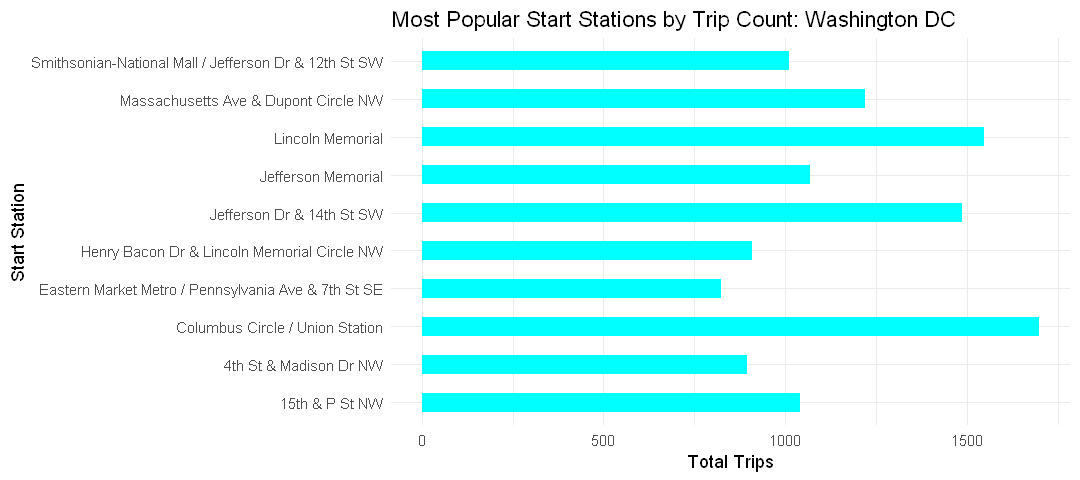

In [11]:
# for Washington dataset

# call most_common_start_function to get the data
wash_most_common_start_station <- most_common_start_station(wash)

# print the data
wash_most_common_start_station

# generate the plot
start_station_plot_viz(wash_most_common_start_station, 'Washington DC')

### Question 2

### **What is the average trip duration for each city?**

**Defining a function that will return the average trip duration in minutes.**

In [12]:
# define a function that will take the data(dataframe) and find the average trip duration
avg_trip_duration <- function(data) {
  avg_duration_secs <- mean(data$Trip.Duration, na.rm = T)
  avg_duration_mins <- avg_duration_secs / 60
  return(round(avg_duration_mins, 1))
}

In [13]:
# for Chicago Dataset
cat("Average trip duration in Chicago:", avg_trip_duration(chi), 'minutes')

Average trip duration in Chicago: 15.6 minutes

In [14]:
# for New York Dataset
cat("Average trip duration in New York:", avg_trip_duration(ny), 'minutes')

Average trip duration in New York: 15.1 minutes

In [15]:
# for Washington Dataset
cat("Average trip duration in Washington:", avg_trip_duration(wash), 'minutes')

Average trip duration in Washington: 20.6 minutes

### Summary
Here we can see that Washington tops the list with highest average trip duration.

<hr>

### Question 3
### **What is the most common hour of day?**

**Defining a function that will generate the plot.**

In [16]:
# define a function that takes data(dataframe) and city(character) to plot the chart between hour and total trips occurred in
# that hour.
hour_count_plot_viz <- function(data, city) {
  main <- sprintf('Trip Count by Hour of the Day: %s', city)
  xlabel <- 'Hour of the Day'
  ylabel <- 'Total Trips'
  p <- ggplot(data, aes(hour, total_trips)) +
    geom_bar(stat = 'identity',
             fill = 'green',
             width = 0.4) +
    ggtitle(main) + 
    xlab(xlabel) +
    ylab(ylabel) +
    theme_minimal()
  return(p)
}

**Defining a function that will take dataset as an argument, group it by hour and summarize it by trip count and return the data generated.**

In [17]:
# define a function that will take the data(dataframe) and aggregate it by hour to find the count
most_common_hour = function(data) {
  data %>%
    group_by(hour) %>%
    summarise(total_trips = n()) %>%
    arrange(hour) %>%
    as.data.frame() %>%
    head(24)
}

Since the Start.Time in all the three dataframes are not in proper format, let's convert the Start.Time datatype and add a new column for hour of the day.

In [18]:
# for New York dataset
ny$Start.Time = as.POSIXct(ny$Start.Time, format="%Y-%m-%d %H:%M:%S")
hour = hour(ny$Start.Time)
ny = cbind(ny, hour=hour)

# for Washington dataset
wash$Start.Time = as.POSIXct(wash$Start.Time, format="%Y-%m-%d %H:%M:%S")
hour = hour(wash$Start.Time)
wash = cbind(wash, hour=hour)

# for Chicago Dataset dataset
chi$Start.Time = as.POSIXct(chi$Start.Time, format="%Y-%m-%d %H:%M:%S")
hour = hour(chi$Start.Time)
chi = cbind(chi, hour=hour)

hour,total_trips
0,55
1,26
2,18
3,16
4,17
5,67
6,243
7,560
8,693
9,385


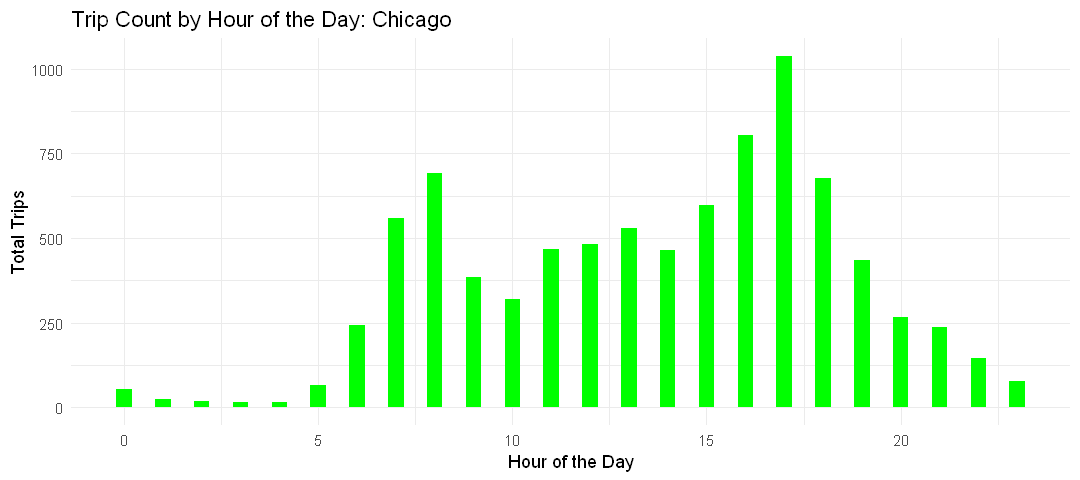

In [19]:
# for Chicago dataset

# call the most_common_hour function to get the data
chi_most_common_hour <- most_common_hour(chi)

# print the result
head(chi_most_common_hour, 10)

# generate the plot
hour_count_plot_viz(chi_most_common_hour, 'Chicago')

hour,total_trips
0,436
1,231
2,152
3,60
4,84
5,312
6,1212
7,2512
8,4337
9,3521


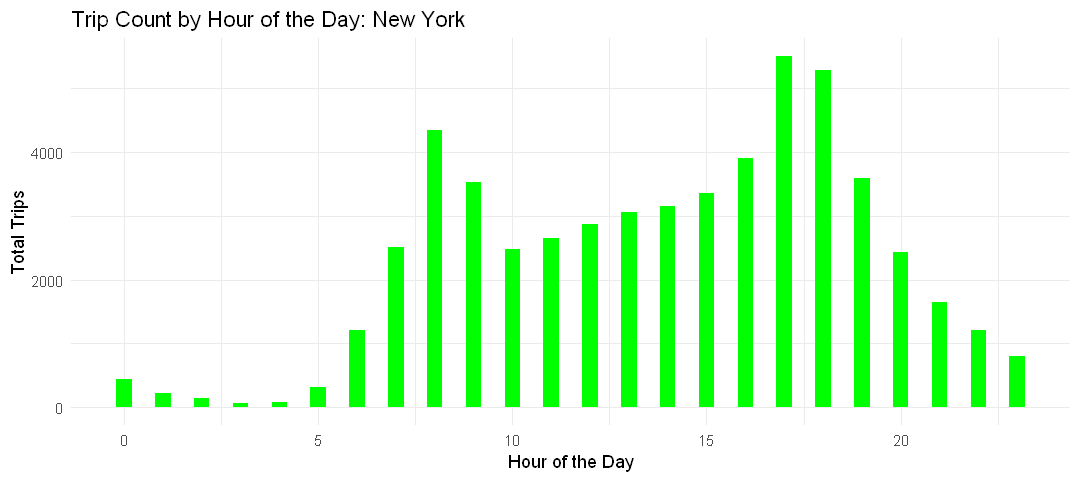

In [20]:
# for New York dataset

# call the most_common_hour function to get the data
ny_most_common_hour <- most_common_hour(ny)

# print the result
head(ny_most_common_hour, 10)

# generate the plot
hour_count_plot_viz(ny_most_common_hour, 'New York')

hour,total_trips
0,227
1,3500
2,3421
3,3655
4,4541
5,6741
6,6994
7,8490
8,9805
9,5957


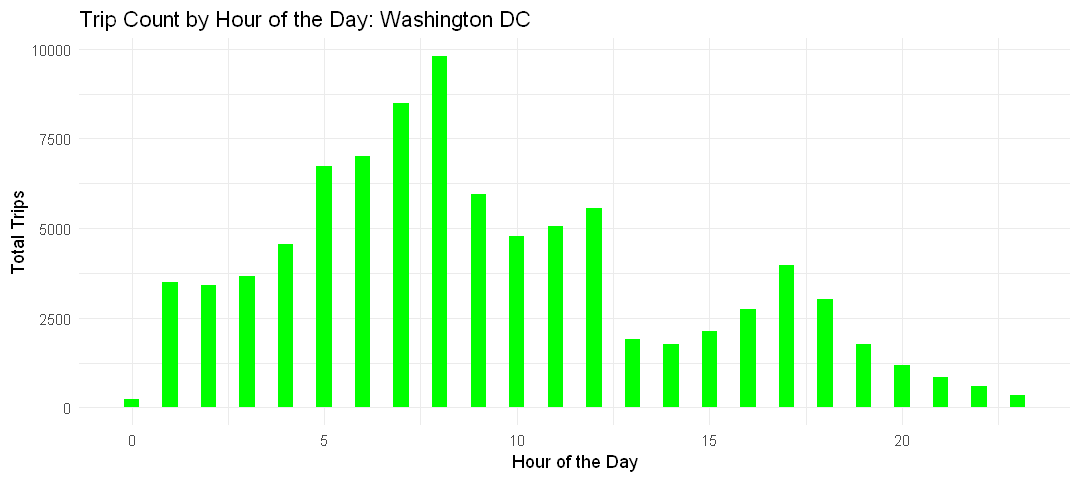

In [21]:
# for Washington dataset

# call the most_common_hour function to get the data
wash_most_common_hour <- most_common_hour(wash)

# print the result
head(wash_most_common_hour, 10)

# generate the plot
hour_count_plot_viz(wash_most_common_hour, 'Washington DC')

### Summary
Here we can see that in Chicago and New York, the busiest hour of the day is 5 PM while in Washington DC it is 8 AM.

<hr>

### Question 4
### **What is the most common trip from start to end (i.e., most frequent combination of start station and end station?**

**Defining a function that will take dataset as an argument, group the data by combination of start and end station and return the top 10 observations.**

In [22]:
# define a function that will take the data(dataframe) and aggregate it by start station and end station to find the most common
# combination of start and end station
most_common_trip <- function(data) {
  data %>%
    group_by(Start.Station, End.Station) %>%
    summarise(total_trips = n()) %>%
    arrange(desc(total_trips)) %>%
    head(10)
}

In [23]:
# for Chicago dataset

# call the most_common_trip function to get the data
most_common_trip(chi)

Start.Station,End.Station,total_trips
Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,32
Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,32
Streeter Dr & Grand Ave,Lake Shore Dr & North Blvd,23
Lake Shore Dr & North Blvd,Streeter Dr & Grand Ave,17
Streeter Dr & Grand Ave,Theater on the Lake,17
Streeter Dr & Grand Ave,Lake Shore Dr & Monroe St,15
Michigan Ave & Oak St,Streeter Dr & Grand Ave,14
Canal St & Madison St,Michigan Ave & Washington St,13
Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,13
Adler Planetarium,Lake Shore Dr & Monroe St,12


In [24]:
# for New York dataset

# call the most_common_trip function to get the data
most_common_trip(ny)

Start.Station,End.Station,total_trips
E 7 St & Avenue A,Cooper Square & E 7 St,33
Central Park S & 6 Ave,Central Park S & 6 Ave,31
Centre St & Chambers St,Centre St & Chambers St,24
Pershing Square North,W 33 St & 7 Ave,24
Pershing Square North,Broadway & W 32 St,20
Central Park North & Adam Clayton Powell Blvd,Central Park North & Adam Clayton Powell Blvd,18
Grand Army Plaza & Central Park S,Central Park S & 6 Ave,18
Vernon Blvd & 50 Ave,McGuinness Blvd & Eagle St,18
Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,17
N 6 St & Bedford Ave,Wythe Ave & Metropolitan Ave,17


In [25]:
# for Washington DC dataset

# call the most_common_trip function to get the data
most_common_trip(wash)

Start.Station,End.Station,total_trips
Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,198
Smithsonian-National Mall / Jefferson Dr & 12th St SW,Smithsonian-National Mall / Jefferson Dr & 12th St SW,192
Lincoln Memorial,Jefferson Dr & 14th St SW,143
Lincoln Memorial,Jefferson Memorial,143
Jefferson Dr & 14th St SW,Lincoln Memorial,138
Lincoln Memorial,Lincoln Memorial,120
Jefferson Memorial,Lincoln Memorial,115
8th & F St NE,Columbus Circle / Union Station,109
Columbus Circle / Union Station,8th & F St NE,107
4th St & Madison Dr NW,4th St & Madison Dr NW,102


Here you can see the most popular combinations of start station and end station by total number of trips.

<hr>

Goodbye.